Purpose of this notebook: 

1. Clean up APRFC historical breakup CSV file
2. Visualize breakup date trends in terms of Julian day
2. Output cleaned version with retained (selected) locations according to chosen criteria

In [ ]:
import pandas as pd
import datetime as dt
from pathlib import Path

In [ ]:
PROJPATH = Path().resolve().parent
outpath = PROJPATH / "data/breakupdata/derived"

We load the newest datafile and limit to breakup dates since 1980

In [ ]:
year = 2025
breakuppth = PROJPATH / "data/breakupdata/NWS-APRFC_AK_BreakupDate-2024.csv"
breakup = pd.read_csv(breakuppth, escapechar='\\')
breakup = breakup[breakup.breakup > '1980-01-01']
breakup

,id,siteID,year,icemoved,timemoved,breakup,Impact Based Flood Severity,firstboat,unsafeman,unsafeveh,typeveh,lastice,remarks,Initial Forecast Start Date,Initial Forecast End Date,qualityFlag,internalNotes
0,7310,Sagavanirktok River at Deadhorse,2024,NaN,NaN,2024-06-06,unknown,NaN,NaN,NaN,NaN,NaN,date estimated based on Sentinel-2,2024-06-18,2024-06-18,NaN,NaN
1,7309,Colville River at Colville Village,2024,NaN,NaN,2023-06-08,unknown,NaN,NaN,NaN,NaN,NaN,date estimated based on Sentinel-2,2024-06-18,2024-06-18,NaN,NaN
2,7308,Colville River at Umiat,2024,NaN,NaN,2024-06-04,unknown,NaN,NaN,NaN,NaN,NaN,date estimated based on Sentinel-2,2024-06-18,2024-06-18,NaN,NaN
3,7307,Koyukuk River at Hughes,2024,NaN,NaN,2024-05-11,unknown,NaN,NaN,NaN,NaN,NaN,date estimated based on Sentinel-2,2024-06-18,2024-06-18,NaN,NaN
4,7306,Koyukuk River at Allakaket,2024,NaN,NaN,2024-05-10,unknown,NaN,NaN,NaN,NaN,NaN,date estimated based on Sentinel-2,2024-06-18,2024-06-18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,212,Buckland River at Buckland,1987,1987-05-21,NaN,1987-05-22,none,NaN,NaN,NaN,NaN,NaN,Jam flooded town 05-21-22.,NaN,NaN,NaN,NaN
6886,211,Buckland River at Buckland,1986,NaN,NaN,1986-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6887,210,Buckland River at Buckland,1984,NaN,NaN,1984-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6888,209,Buckland River at Buckland,1983,NaN,NaN,1983-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We set a threshold for the number of valid breakup data points we require. Initially this was set to 30. However, for 2025 we want to set the value lower to capture locations on the Colville River. 

In any event, the list of locations generated by this exploration should be manually edited to remove locations of lower interest. 

In [ ]:
thresh = 20
breakup_clean = breakup.groupby('siteID').filter(lambda x: len(x) >= thresh)[['id', 'siteID', 'year', 'breakup']].reset_index(drop=True)
breakup_clean

,id,siteID,year,breakup
0,7309,Colville River at Colville Village,2024,2023-06-08
1,7308,Colville River at Umiat,2024,2024-06-04
2,7307,Koyukuk River at Hughes,2024,2024-05-11
3,7306,Koyukuk River at Allakaket,2024,2024-05-10
4,7305,Koyukuk River at Bettles,2024,2024-05-10
...,...,...,...,...
1905,213,Buckland River at Buckland,1988,1988-05-05
1906,212,Buckland River at Buckland,1987,1987-05-22
1907,211,Buckland River at Buckland,1986,1986-05-30
1908,210,Buckland River at Buckland,1984,1984-05-23


How many data points are there since 1980? 

In [ ]:
breakup_clean.siteID.value_counts()

Kuskokwim River at McGrath                  45
Tanana River at Nenana                      45
Yukon River at Dawson                       45
Kuskokwim River at Bethel                   45
Yukon River at Eagle                        45
Yukon River at Galena                       44
Koyukuk River at Bettles                    43
Kuskokwim River at Aniak                    42
Kobuk River at Kobuk                        41
Yukon River at Fort Yukon                   41
Yukon River at Circle                       41
Yukon River at Tanana                       40
Kuskokwim River at Akiak                    39
Kuskokwim River at Red Devil                39
Kuskokwim River at Crooked Creek            39
Yukon River at Ruby                         39
Yukon River at Kaltag                       39
Kuskokwim River at Nikolai                  39
Koyukuk River at Allakaket                  39
Kobuk River at Ambler                       39
Yukon River nr Emmonak                      39
Yukon River a

Calculate the Julian Day of each breakup event

In [ ]:
breakup_clean['JulianDay'] = pd.to_datetime(breakup_clean.breakup).dt.strftime('%j').astype('int')
breakup_clean['year'] = breakup_clean.year.astype('int')
breakup_clean

,id,siteID,year,breakup,JulianDay
0,7309,Colville River at Colville Village,2024,2023-06-08,159
1,7308,Colville River at Umiat,2024,2024-06-04,156
2,7307,Koyukuk River at Hughes,2024,2024-05-11,132
3,7306,Koyukuk River at Allakaket,2024,2024-05-10,131
4,7305,Koyukuk River at Bettles,2024,2024-05-10,131
...,...,...,...,...,...
1905,213,Buckland River at Buckland,1988,1988-05-05,126
1906,212,Buckland River at Buckland,1987,1987-05-22,142
1907,211,Buckland River at Buckland,1986,1986-05-30,150
1908,210,Buckland River at Buckland,1984,1984-05-23,144


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

<AxesSubplot: xlabel='year'>

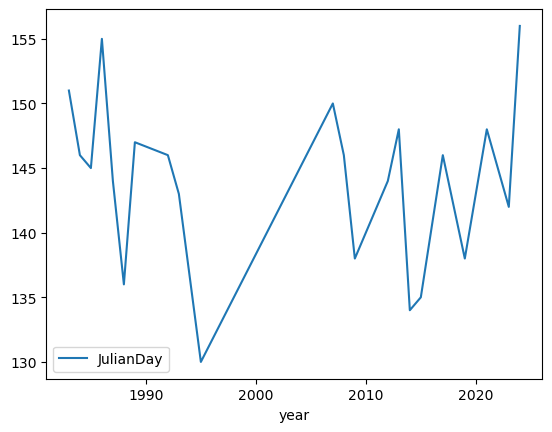

In [ ]:
breakup_clean[breakup_clean.siteID=="Colville River at Umiat"].sort_values('year').plot(x="year", y="JulianDay")

Load dataset again - for trend analysis, keep all years, for the selected locations.  

In [ ]:
breakup_all = pd.read_csv(breakuppth, escapechar='\\')
breakup_all_clean = breakup_all[breakup_all.breakup > '1940-01-01']
breakup_all_clean = breakup_all_clean[breakup_all_clean.siteID.isin(breakup_clean.siteID)]
breakup_all_clean['JulianDay'] = pd.to_datetime(breakup_all_clean.breakup).dt.strftime('%j').astype('int')
breakup_all_clean['year'] = breakup_all_clean.year.astype('int')

Some plotting options with visualization of significant trends by p-value

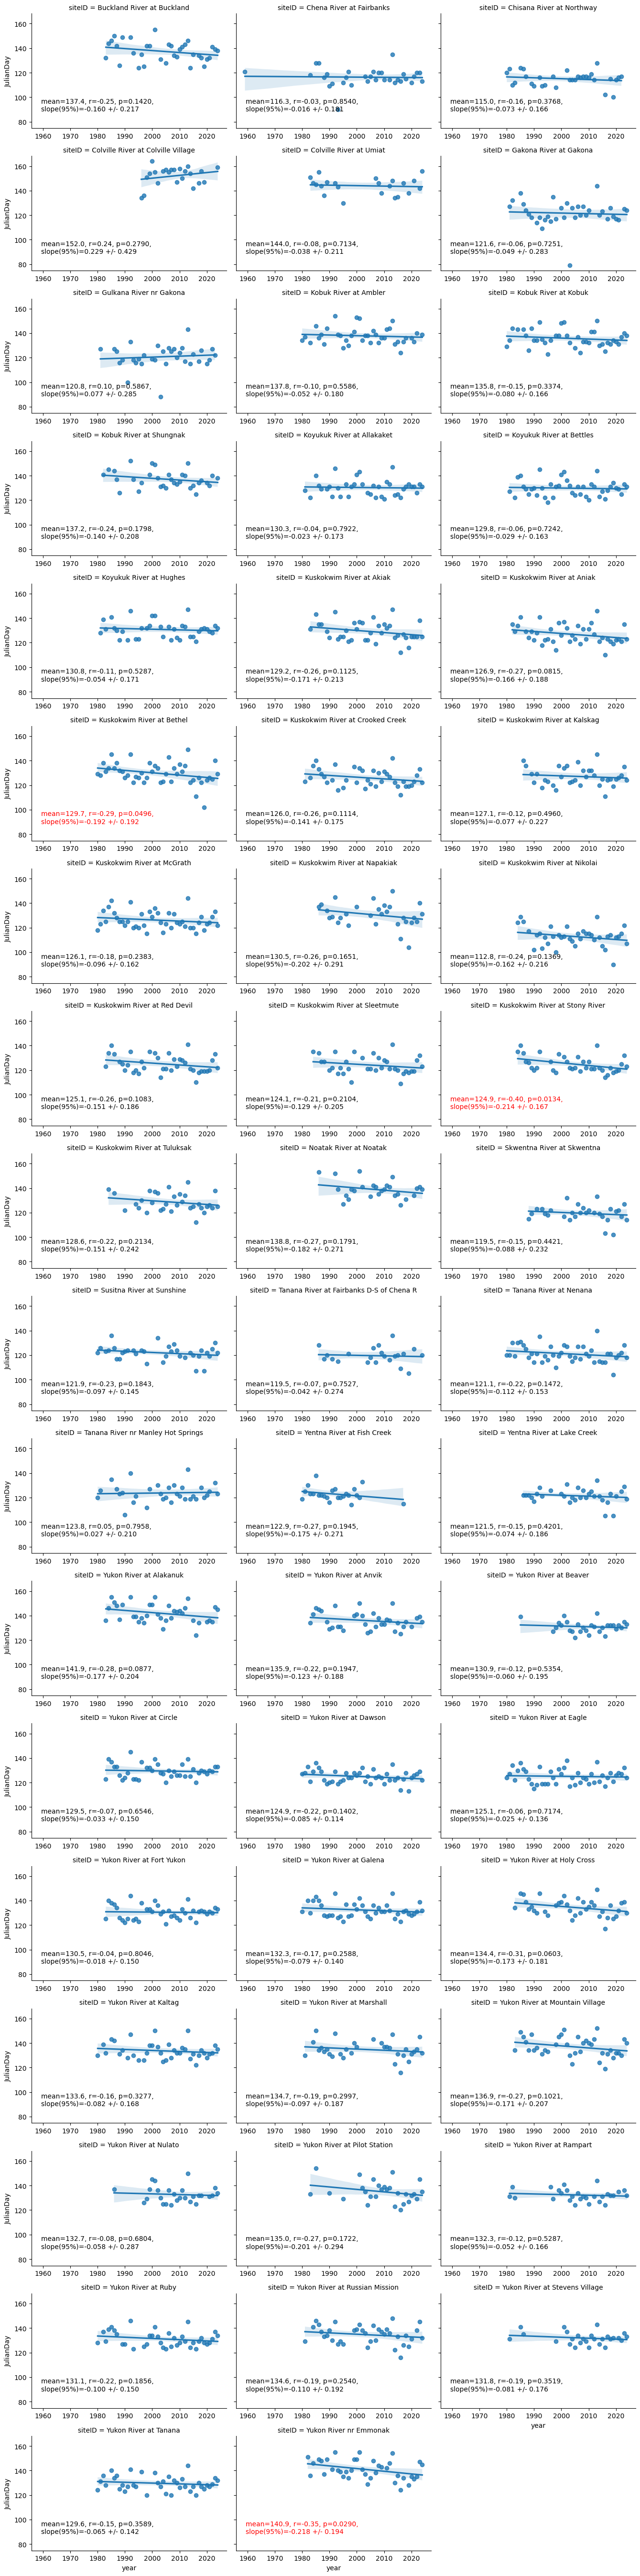

In [ ]:
g = sns.lmplot(data=breakup_clean.sort_values(by=['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.5)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

Text(0.27, 0.965, '(Selected locations have at least 21 years of data since 1980)')

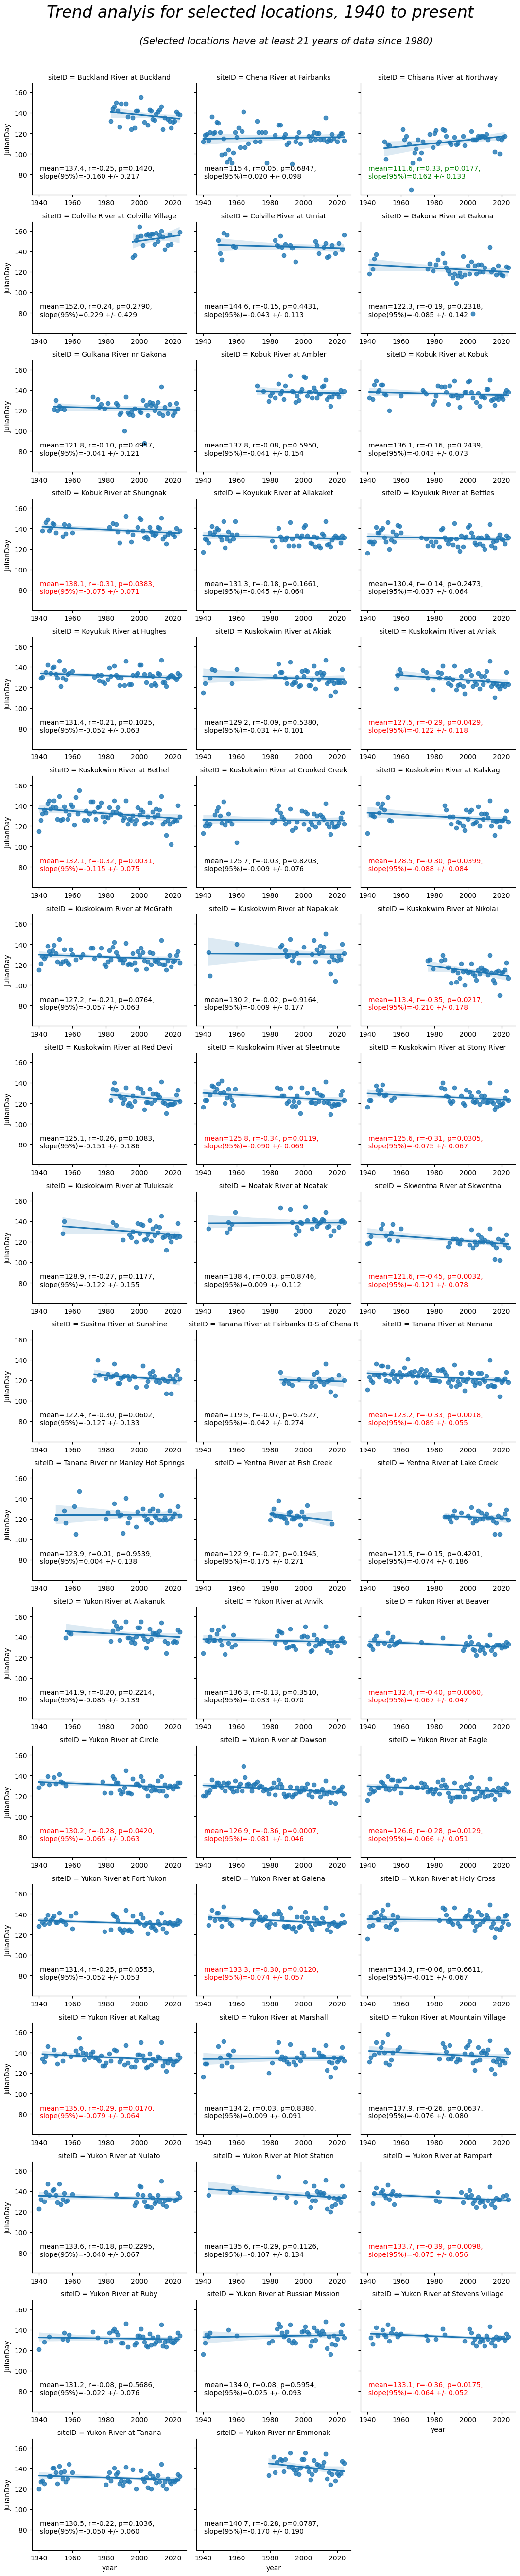

In [ ]:
g = sns.lmplot(data=breakup_all_clean.sort_values(['siteID', 'year']), x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.2,)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.fig.subplots_adjust(top=0.95) 
g.fig.suptitle('Trend analyis for selected locations, 1940 to present', fontsize=24, style="italic")
g.fig.text(x=0.27, y=0.965, s=f'(Selected locations have at least {thresh} years of data since 1980)', fontsize=14, style="italic")


Plot for one river

In [ ]:
river = 'Kuskokwim River'
breakup_clean[breakup_clean.siteID.str.startswith(river)]

,id,siteID,year,breakup,JulianDay
16,7292,Kuskokwim River at Tuluksak,2024,2024-05-04,125
17,7291,Kuskokwim River at Akiak,2024,2024-05-04,125
32,7272,Kuskokwim River at Bethel,2024,2024-05-08,129
33,7271,Kuskokwim River at Napakiak,2024,2024-05-10,131
34,7269,Kuskokwim River at Kalskag,2024,2024-05-03,124
...,...,...,...,...,...
1582,2722,Kuskokwim River at Akiak,1989,1989-05-09,129
1583,2720,Kuskokwim River at Akiak,1987,1987-05-15,135
1584,2719,Kuskokwim River at Akiak,1986,1986-05-15,135
1585,2718,Kuskokwim River at Akiak,1985,1985-05-23,143


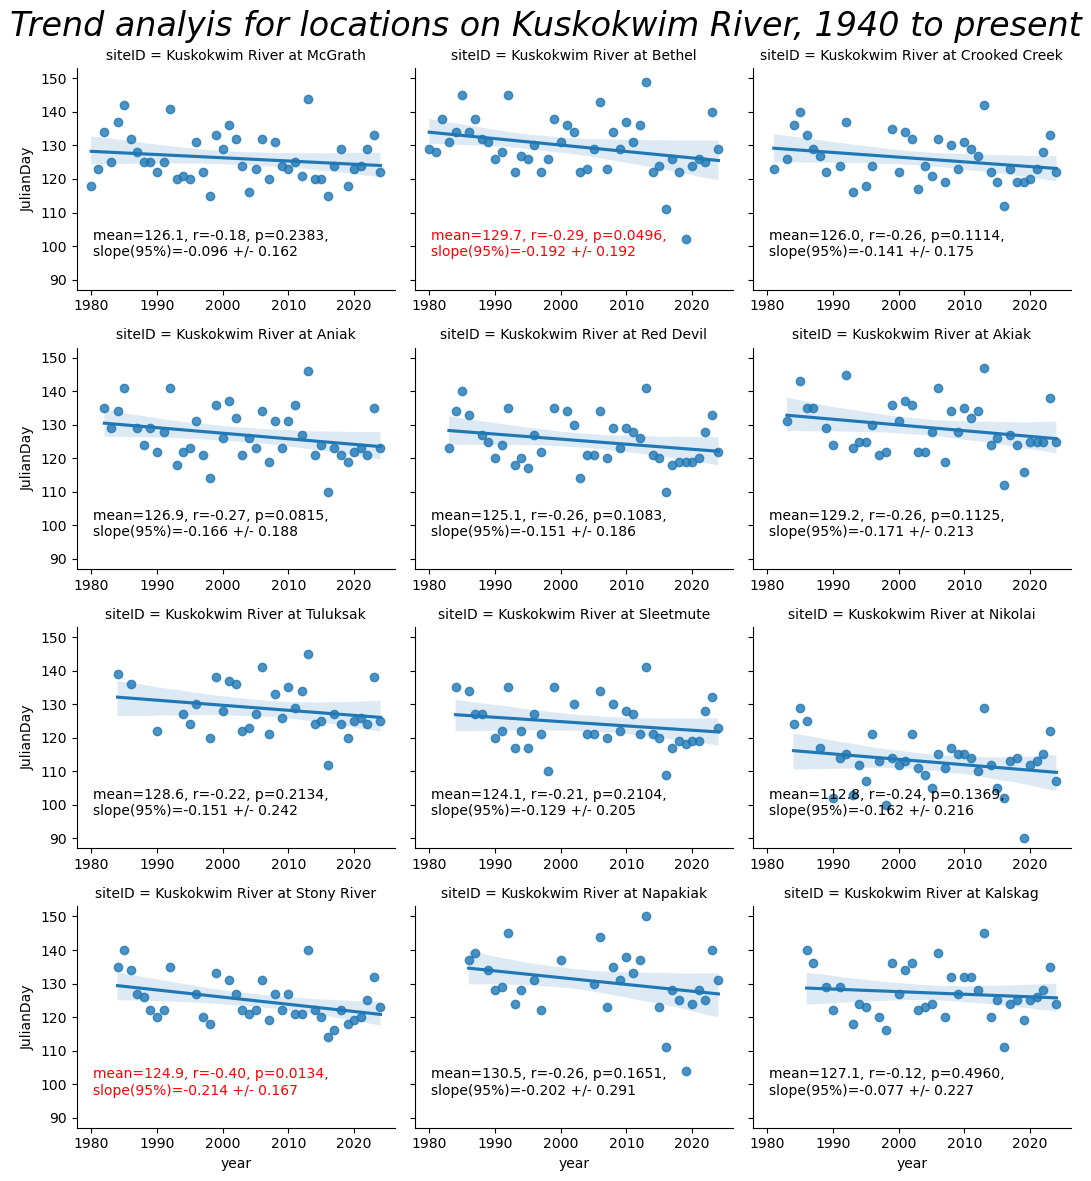

In [ ]:
river = 'Kuskokwim River'

g = sns.lmplot(data=breakup_clean[breakup_clean.siteID.str.startswith(river)].sort_values(['year']), 
               x="year", y="JulianDay",
               col='siteID', col_wrap=3, height=3, aspect=1.2,)

def annotate(data, **kws):
    result = scipy.stats.linregress(data['year'], data['JulianDay'])
    avg = data['JulianDay'].mean()
    # t-test for 95 % confidence interval:
    tinv = lambda p, df: abs(scipy.stats.t.ppf(p/2, df))
    ts = tinv(0.05, len(data['year'])-2)
    ax = plt.gca()
    if result.pvalue < 0.05:
        if result.rvalue < 0:
            color="red"
        if result.rvalue > 0:
            color="green"
    else:
        color="black"
    ax.text(.05, .15, f'mean={avg:.1f}, r={result.rvalue:.2f}, p={result.pvalue:.4f},\nslope(95%)={result.slope:.3f} +/- {ts*result.stderr:.3f}',
            transform=ax.transAxes, color=color)

g.map_dataframe(annotate)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.figure.subplots_adjust(top=0.9) 
g.figure.suptitle(f'Trend analyis for locations on {river}, 1940 to present', fontsize=24, style="italic")
g.tight_layout()
# g.fig.text(x=0.27, y=0.965, s=f'(Selected locations have at least {thresh} years of data since 1980)', fontsize=14, style="italic")


In [ ]:
with open(outpath / "breakupDate_cleaned.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv from 2024\n")
    dst.write(f"# Only sites with more than {thresh} data points since 1980\n")
    dst.write("# \n")
    breakup_clean.to_csv(dst)    

### Breakupdata and averages of selected locations

In [ ]:
breakupDS = pd.read_csv(outpath / "breakupDate_cleaned.csv", skiprows=3, index_col=0)
breakupDS

,id,siteID,year,breakup,JulianDay
0,7309,Colville River at Colville Village,2024,2023-06-08,159
1,7308,Colville River at Umiat,2024,2024-06-04,156
2,7307,Koyukuk River at Hughes,2024,2024-05-11,132
3,7306,Koyukuk River at Allakaket,2024,2024-05-10,131
4,7305,Koyukuk River at Bettles,2024,2024-05-10,131
...,...,...,...,...,...
1905,213,Buckland River at Buckland,1988,1988-05-05,126
1906,212,Buckland River at Buckland,1987,1987-05-22,142
1907,211,Buckland River at Buckland,1986,1986-05-30,150
1908,210,Buckland River at Buckland,1984,1984-05-23,144


In [ ]:
selected_rivers = ('Tanana', 'Kuskokwim', 'Koyukuk', 
                   'Yukon', 'Kobuk', 'Buckland', 'Colville', 'Susitna')

In [ ]:
breakupDS = breakupDS[
    breakupDS.siteID.str.startswith(selected_rivers)].sort_values(by=['siteID', 'year'])

In [ ]:
with open(outpath / "breakupDate_cleaned_selected.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv as of 2024\n")
    dst.write(f"# Only sites with more than {thresh} data points since 1980 on selected Rivers\n")
    dst.write("# \n")
    breakupDS.to_csv(dst)   

In [ ]:
breakupDS['siteID'].value_counts().reset_index().sort_values(['index'])

,index,siteID
31,Buckland River at Buckland,35
42,Colville River at Colville Village,23
43,Colville River at Umiat,22
19,Kobuk River at Ambler,39
9,Kobuk River at Kobuk,41
35,Kobuk River at Shungnak,33
18,Koyukuk River at Allakaket,39
6,Koyukuk River at Bettles,43
22,Koyukuk River at Hughes,38
17,Kuskokwim River at Akiak,39


Quick comparison with previous years selected locations or at least available locations

In [ ]:
old_df = pd.read_csv(outpath / 'breakupDate_mean_std_JD_redux.csv', skiprows=4)
set(old_df.siteID) - set(breakupDS.siteID)

{'Gakona River at Gakona',
 'Gulkana River nr Gakona',
 'Koyukuk River at Huslia',
 'Yentna River at Fish Creek',
 'Yentna River at Lake Creek',
 'Yukon River at Koyukuk'}

In [ ]:
len(breakupDS['siteID'].unique())

45

In [ ]:
breakup_agg = breakupDS.groupby(['siteID'])['JulianDay'].agg(['mean', 'std'])
breakup_agg = breakup_agg.reset_index()
#breakup_agg['breakup_avgday'] = breakup_agg.apply(lambda row: dt.date(2022, 3, 1) + dt.timedelta(days=row['mean'], axis=1))
breakup_agg

,siteID,mean,std
0,Buckland River at Buckland,137.371429,8.077149
1,Colville River at Colville Village,152.043478,7.534637
2,Colville River at Umiat,144.000000,6.640425
3,Kobuk River at Ambler,137.820513,6.735108
4,Kobuk River at Kobuk,135.756098,6.818286
5,Kobuk River at Shungnak,137.151515,6.924238
6,Koyukuk River at Allakaket,130.282051,6.529080
7,Koyukuk River at Bettles,129.790698,6.523066
8,Koyukuk River at Hughes,130.763158,6.715992
9,Kuskokwim River at Akiak,129.153846,7.828889


In [ ]:
breakupDS.siteID.value_counts()

Yukon River at Eagle                        45
Yukon River at Dawson                       45
Tanana River at Nenana                      45
Kuskokwim River at Bethel                   45
Kuskokwim River at McGrath                  45
Yukon River at Galena                       44
Koyukuk River at Bettles                    43
Kuskokwim River at Aniak                    42
Yukon River at Fort Yukon                   41
Kobuk River at Kobuk                        41
Yukon River at Circle                       41
Yukon River at Tanana                       40
Yukon River at Kaltag                       39
Kuskokwim River at Red Devil                39
Kuskokwim River at Nikolai                  39
Yukon River nr Emmonak                      39
Kuskokwim River at Crooked Creek            39
Kuskokwim River at Akiak                    39
Koyukuk River at Allakaket                  39
Kobuk River at Ambler                       39
Yukon River at Ruby                         39
Yukon River a

In [ ]:
with open(outpath / f"breakupDate_validdata_1980-{year-1}.csv", "w") as dst:
    dst.write("# Number of valid data points for each breakup location \n")
    dst.write(f"# Only sites with more than {thresh} data points since 1980 on selected Rivers\n")
    dst.write("# \n")
    outDS = pd.DataFrame(breakupDS.siteID.value_counts()).reset_index()
    outDS.columns = ['siteID', 'count']
    outDS.to_csv(dst, )  

In [ ]:
breakup_agg

,siteID,mean,std,expected_2025
0,Buckland River at Buckland,137.371429,8.077149,2025-05-17
1,Colville River at Colville Village,152.043478,7.534637,2025-06-01
2,Colville River at Umiat,144.000000,6.640425,2025-05-24
3,Kobuk River at Ambler,137.820513,6.735108,2025-05-18
4,Kobuk River at Kobuk,135.756098,6.818286,2025-05-16
5,Kobuk River at Shungnak,137.151515,6.924238,2025-05-17
6,Koyukuk River at Allakaket,130.282051,6.529080,2025-05-10
7,Koyukuk River at Bettles,129.790698,6.523066,2025-05-10
8,Koyukuk River at Hughes,130.763158,6.715992,2025-05-11
9,Kuskokwim River at Akiak,129.153846,7.828889,2025-05-09


We add the expected breakupdate for 2025 from the average since 1980 at each location

In [ ]:
breakup_agg[f'expected_2025'] = (
    pd.to_datetime(f'{year}') + 
    pd.to_timedelta(breakup_agg['mean'].round().astype(int)-1, unit='D')
    ).dt.date

Also, we have lat/lon that were manually retrieved for the previous set of breakup locations and we can add those here. 

In [ ]:
old_df = pd.read_csv(outpath / 'breakupDate_mean_std_since1980_latlong.csv', 
                     skiprows=4, index_col=0)
breakup_agg = pd.merge(breakup_agg, old_df[['siteID', 'lat', 'lon']], on='siteID', how='left')

In [ ]:
with open(outpath / f"breakupDate_mean_std_JD.csv", "w") as dst:
    dst.write("# Data from NWS-APRFC_AK_BreakupDate.csv to 2024\n")
    dst.write("# Means and std of breakup day as Julian Day \n")
    dst.write(f"# Only sites with more than {thresh} data points since 1980 on selected Rivers\n")
    dst.write("# \n")
    breakup_agg.to_csv(dst, float_format='%.5f')   

In [ ]:
breakupDS[breakupDS.siteID=='Tanana River at Nenana'].sort_values(by=['year']).to_csv(outpath / 'Nenana_working.csv')

---

Add river and locality to breakup averages

In [ ]:
breakupstats = PROJPATH / f"data/breakupdata/derived/breakupdate_mean_std_JD.csv"
outpth = PROJPATH / f"data/breakupdata/working/breakupdate_mean_std_JD.csv"

breakup = pd.read_csv(breakupstats, skiprows=4, index_col=0)
breakup

,siteID,mean,std,expected_2025,lat,lon
0,Buckland River at Buckland,137.37143,8.07715,2025-05-17,65.97851,-161.12066
1,Colville River at Colville Village,152.04348,7.53464,2025-06-01,NaN,NaN
2,Colville River at Umiat,144.00000,6.64042,2025-05-24,NaN,NaN
3,Kobuk River at Ambler,137.82051,6.73511,2025-05-18,67.08493,-157.85178
4,Kobuk River at Kobuk,135.75610,6.81829,2025-05-16,66.90743,-156.88926
5,Kobuk River at Shungnak,137.15152,6.92424,2025-05-17,66.88657,-157.13284
6,Koyukuk River at Allakaket,130.28205,6.52908,2025-05-10,66.56584,-152.65081
7,Koyukuk River at Bettles,129.79070,6.52307,2025-05-10,66.92262,-151.51908
8,Koyukuk River at Hughes,130.76316,6.71599,2025-05-11,66.04771,-154.26336
9,Kuskokwim River at Akiak,129.15385,7.82889,2025-05-09,60.91029,-161.21127


In [ ]:
breakup['tmp'] = breakup.siteID.str.replace('nr', 'at')
breakup[['river', 'locality']] = breakup.tmp.str.split(' at ', n=1, expand=True)
breakup.drop(columns=['tmp'], inplace=True)

In [ ]:
breakup

,siteID,mean,std,expected_2025,lat,lon,river,locality
0,Buckland River at Buckland,137.37143,8.07715,2025-05-17,65.97851,-161.12066,Buckland River,Buckland
1,Colville River at Colville Village,152.04348,7.53464,2025-06-01,NaN,NaN,Colville River,Colville Village
2,Colville River at Umiat,144.00000,6.64042,2025-05-24,NaN,NaN,Colville River,Umiat
3,Kobuk River at Ambler,137.82051,6.73511,2025-05-18,67.08493,-157.85178,Kobuk River,Ambler
4,Kobuk River at Kobuk,135.75610,6.81829,2025-05-16,66.90743,-156.88926,Kobuk River,Kobuk
5,Kobuk River at Shungnak,137.15152,6.92424,2025-05-17,66.88657,-157.13284,Kobuk River,Shungnak
6,Koyukuk River at Allakaket,130.28205,6.52908,2025-05-10,66.56584,-152.65081,Koyukuk River,Allakaket
7,Koyukuk River at Bettles,129.79070,6.52307,2025-05-10,66.92262,-151.51908,Koyukuk River,Bettles
8,Koyukuk River at Hughes,130.76316,6.71599,2025-05-11,66.04771,-154.26336,Koyukuk River,Hughes
9,Kuskokwim River at Akiak,129.15385,7.82889,2025-05-09,60.91029,-161.21127,Kuskokwim River,Akiak


In [ ]:
with open(breakupstats, 'r') as file:
        lines = [next(file) for _ in range(4)]
with open(outpth, "w") as dst:
        dst.writelines(lines)
        breakup.to_csv(dst)